<a href="https://colab.research.google.com/github/taceroc/DSPS_TAcero/blob/main/HW8/Copy_of_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [ ]:
cd /content/drive/MyDrive/DSPS_2021/HW8/

/content/drive/MyDrive/DSPS_2021/HW8


In [ ]:
# !mkdir .kaggle/

In [ ]:
# !mv kaggle.json .kaggle

In [ ]:
ls -a

'Copy of higgsbosonSearch.ipynb'           random_submission.zip   training.zip
 HiggsBosonCompetition_AMSMetric_rev1.py   test.zip
 .kaggle/                                  training.csv


In [ ]:
# !chmod 600 .kaggle/kaggle.json

In [ ]:
# import json
# import os
# envs = json.load(open(".kaggle/kaggle.json", "r"))

In [ ]:
# os.environ["KAGGLE_USERNAME"] = envs["username"]
# os.environ["KAGGLE_KEY"] = envs["key"]

In [ ]:
# ! kaggle competitions download -c higgs-boson


- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [ ]:
# ! unzip training.zip

In [ ]:
import pandas as pd
import json
import os
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [ ]:
higgsdata = pd.read_csv("training.csv")

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
# higgsdata.head()

In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


I'm looking for the columns that the min, the 25$\%$ and the  50$\%$ values are the same.

In [ ]:
cols = [i for i in higgsdata.describe().columns if 
 (higgsdata.describe().loc["min"][i] == higgsdata.describe().loc["25%"][i]== higgsdata.describe().loc["50%"][i])]

In [ ]:
len(cols)

7

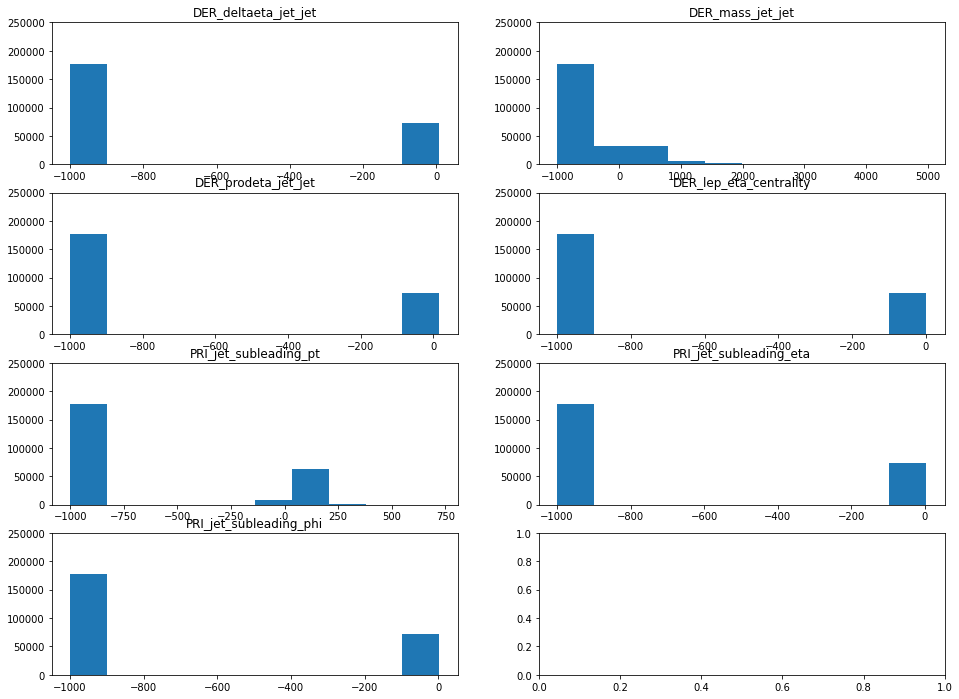

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (16,12))
kk = 0
for i in range(4):
  for j in range(2):
    if kk != 7:
      # print(i, j, kk)
      ax[i, j].hist(higgsdata[cols[kk]].to_numpy())
      ax[i, j].set_title(cols[kk])
      ax[i, j].set_ylim(0, len(higgsdata))
      kk = kk+1
    

I'm going to drop this columns

In [ ]:
higgsdata = higgsdata.drop(cols, axis = 1)

In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1633.433000,7.822543


In [ ]:
len(higgsdata)

250000

Now I'm looking the columns that only min and 25$\%$ values are equal to -999

In [ ]:
cols = [i for i in higgsdata.describe().columns if 
 (higgsdata.describe().loc["min"][i] == higgsdata.describe().loc["25%"][i]==-999)]

In [ ]:
cols

['PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi']

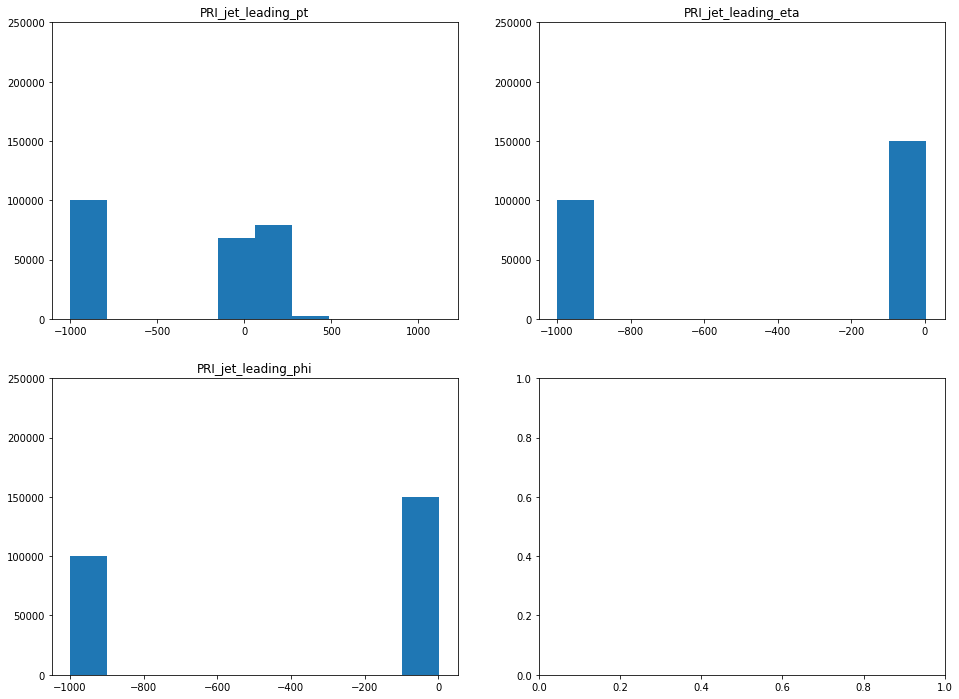

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,12))
kk = 0
for i in range(2):
  for j in range(2):
    if kk != 3:
      # print(i, j, kk)
      ax[i, j].hist(higgsdata[cols[kk]].to_numpy())
      ax[i, j].set_title(cols[kk])
      ax[i, j].set_ylim(0, len(higgsdata))
      kk = kk+1
    

I'm not going to drop the rows where these three columns are equal to -999

In [ ]:
indexes = higgsdata.loc[(higgsdata['PRI_jet_leading_pt'] == -999) & (higgsdata['PRI_jet_leading_eta']== -999) \
              & (higgsdata['PRI_jet_leading_phi']== -999)].index

In [ ]:
higgsdata = higgsdata.drop(indexes)
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,44.251,2.347389,b
5,100005,89.744,13.550,59.149,116.344,1.362,61.619,278.876,0.588,0.479,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,2.941,2.545,305.967,3.371,1.393,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,179.877,0.002653,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249991,349991,133.457,77.540,88.989,69.650,2.484,2.490,166.396,0.629,-0.084,58.596,-0.834,-0.711,36.831,-1.172,1.749,41.870,-1.073,203.174,1,70.969,-1.234,2.521,70.969,0.001502,s
249992,349992,-999.000,38.083,749.970,77.877,4.351,44.689,583.680,0.275,-1.413,298.035,1.110,-0.023,82.076,-1.932,3.088,159.927,-2.861,652.616,3,91.581,-0.996,-3.109,203.569,0.744056,b
249993,349993,130.075,3.918,66.781,77.369,3.102,49.937,610.482,1.354,-0.634,27.364,2.403,1.348,37.052,1.775,-1.689,67.702,-1.768,694.010,3,155.864,-0.358,1.093,546.066,0.001503,s
249994,349994,217.020,47.156,62.824,127.953,2.318,3.628,242.586,1.393,1.393,28.586,1.094,1.729,39.824,0.700,-0.555,97.737,0.220,271.082,2,141.752,0.237,3.126,174.176,0.064061,b


Drop rows where "DER_mass_MMC" is -999

(array([1.1991e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0806e+04,
        9.4841e+04, 2.0840e+03, 2.8700e+02, 7.1000e+01, 7.0000e+00]),
 array([-999.    , -779.8974, -560.7948, -341.6922, -122.5896,   96.513 ,
         315.6156,  534.7182,  753.8208,  972.9234, 1192.026 ]),
 <a list of 10 Patch objects>)

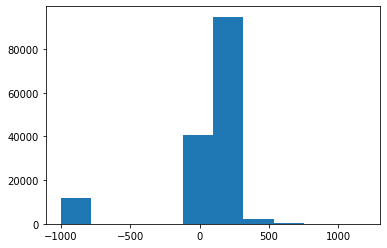

In [ ]:
plt.hist(higgsdata["DER_mass_MMC"].to_numpy())

In [ ]:
higgsdata = higgsdata[(higgsdata["DER_mass_MMC"] != -999)]

In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt,Weight
count,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.00000,138096.000000,138096.000000,138096.000000,138096.000000,138096.00000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000,138096.000000
mean,225142.435284,122.494858,38.011279,80.331503,89.092456,2.179998,21.751239,215.740221,1.457068,0.496388,42.25014,-0.004524,-0.004522,49.547634,0.001049,0.04427,45.741170,0.002623,269.360979,1.643038,86.212482,-0.003105,-0.014277,123.942448,0.803422
std,72177.724354,60.043466,30.933414,40.827064,67.428692,0.767418,23.474133,121.702819,0.976873,1.013750,25.87531,1.196147,1.816185,25.364150,1.226318,1.81549,36.523426,1.813343,131.407661,0.727425,61.552110,1.785636,1.813084,101.515661,1.086433
min,100000.000000,9.806000,0.000000,7.202000,0.000000,0.224000,0.000000,77.017000,0.047000,-1.414000,20.00000,-2.498000,-3.141000,26.000000,-2.489000,-3.14200,0.200000,-3.142000,21.066000,1.000000,30.000000,-4.499000,-3.142000,30.000000,0.001502
25%,162680.750000,92.743000,12.675750,58.884750,42.958750,1.604000,3.396000,131.398750,0.812000,-0.263000,25.74900,-0.902000,-1.568000,32.793000,-0.934000,-1.51800,23.114500,-1.564000,179.689500,1.000000,45.115000,-1.343000,-1.584000,50.261000,0.001503
50%,225242.000000,112.831000,30.803000,72.571500,69.304500,2.212000,17.917000,181.144000,1.233000,1.002000,34.32800,-0.014000,-0.024000,41.901000,0.001000,0.08700,36.967500,0.001000,240.135500,1.000000,66.765000,-0.003000,-0.037000,94.176500,0.073899
75%,287643.250000,134.684000,57.707000,90.318250,114.179000,2.754000,30.619000,260.816500,1.817000,1.343000,49.47425,0.892000,1.570000,57.577000,0.935000,1.61500,55.901250,1.573000,325.372250,2.000000,105.292250,1.339000,1.559000,162.056500,1.681611
max,349997.000000,1192.026000,594.287000,959.601000,1053.807000,5.655000,466.525000,1852.462000,19.773000,1.414000,622.86200,2.497000,3.142000,461.896000,2.502000,3.14200,951.363000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,1633.433000,7.822543


In [ ]:
labels = higgsdata["Label"].to_numpy()

In [ ]:
# -- classification
labels

array(['s', 'b', 'b', ..., 's', 'b', 's'], dtype=object)

In [ ]:
weights = higgsdata["Weight"].to_numpy()

In [ ]:
# -- regression
weights

array([2.65331134e-03, 2.23358449e+00, 8.34140313e-02, ...,
       1.50270483e-03, 6.40607773e-02, 1.86361167e-02])

In [ ]:
# weights

In [ ]:
# leave
from sklearn.model_selection import train_test_split 

In [ ]:
# train_test_split?

In [ ]:
data_train, data_test, ll_train, ll_test = train_test_split(
    higgsdata, labels, test_size=0.33, random_state=17)

In [ ]:
data_train.shape, ll_train.shape

((92524, 26), (92524,))

In [ ]:
data_test.shape, ll_test.shape

((45572, 26), (45572,))

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [ ]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
# rf = RandomForestClassifier(random_state = 0)
# print('Parameters currently in use:\n')
# print(rf.get_params())

In [ ]:
# data_train.columns[:-2]

In [ ]:
data_train_short = data_train[['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt']]

data_test_short = data_test[['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt']]     

In [ ]:
rf = RandomForestClassifier(max_depth=23, criterion="gini", random_state=222)

In [ ]:
# gbt = GradientBoostingClassifier(max_depth=13, random_state=222) # score higher for training 0.9765 but testing 0.8376

gbt = GradientBoostingClassifier(max_depth=10, random_state=222)

In [ ]:
rf.fit(data_train_short.values, ll_train)

RandomForestClassifier(max_depth=23, random_state=222)

In [ ]:
gbt.fit(data_train_short.values, ll_train)

GradientBoostingClassifier(max_depth=10, random_state=222)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [ ]:
print ("score train data RF %.4f"%rf.score(data_train_short.values, ll_train))

score train data RF 0.9932


In [ ]:
print ("score test data RF %.4f"%rf.score(data_test_short.values, ll_test))

score test data RF 0.8151


In [ ]:
# rf.score(...

In [ ]:
print ("score train data GBT %.4f"%gbt.score(data_train_short.values, ll_train))

score train data GBT 0.9282


In [ ]:
print ("score test data GBT %.4f"%gbt.score(data_test_short.values, ll_test))

score test data GBT 0.8175


- Produce a confusion matrix for each model and compare them


 



In [ ]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=plt.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    # fig, ax = plt.subplots(1, 1)
    # fig.subplots_adjust()
    im = plt.imshow(cm, cmap=cmap)
    # ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=["b", "s"])
    # plt.ylim(-0.5,1.5)
    plt.yticks([0, 1], labels=["b", "s"])    
    # plt.title(title)
    plt.text(0,0,cm[0][0], verticalalignment='center', horizontalalignment='center', color='k')
    plt.text(1,0,cm[0][1], verticalalignment='center', horizontalalignment='center', color='white')
    plt.text(0,1,cm[1][0], verticalalignment='center', horizontalalignment='center', color='white')
    plt.text(1,1,cm[1][1], verticalalignment='center', horizontalalignment='center', color='k')


    plt.text(0,0-0.1,str(np.round(((cm[0][0] / cm[0].sum())*100),1))+"%", verticalalignment='center', horizontalalignment='center', color='k')
    plt.text(1,0-0.1,str(np.round(((cm[0][1] / cm[0].sum())*100),1))+"%", verticalalignment='center', horizontalalignment='center', color='white')
    plt.text(0,1-0.1,str(np.round(((cm[1][0] / cm[1].sum())*100),1))+"%", verticalalignment='center', horizontalalignment='center', color='white')
    plt.text(1,1-0.1,str(np.round(((cm[1][1] / cm[1].sum())*100),1))+"%", verticalalignment='center', horizontalalignment='center', color='k')
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

    # cax = ax_divider.append_axes("right", size="10%", pad="2%")
    plt.colorbar(im)
    plt.show()
    

In [ ]:
# plt.text?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


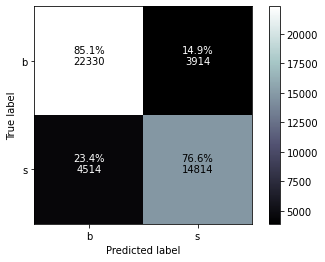

In [ ]:
y_test_pred_rf  = rf.predict(data_test_short)
plot_confusion_matrix(ll_test, y_test_pred_rf, title="RF testing data")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


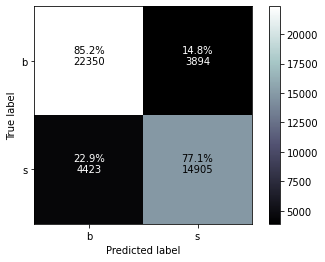

In [ ]:
y_test_pred_gbt  = gbt.predict(data_test_short)
plot_confusion_matrix(ll_test, y_test_pred_gbt, title="GBT testing data")


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(
    higgsdata, weights, random_state=17)

In [ ]:
traindata_weights.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt', 'Weight', 'Label'],
      dtype='object')

In [ ]:
traindata_weights = traindata_weights[['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt']]

testdata_weights = testdata_weights[['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=50, max_depth=23,
                                  random_state=0)
rfR.fit(traindata_weights.values, train_weights)

RandomForestRegressor(max_depth=23, n_estimators=50, random_state=0)

In [ ]:
gbtR = GradientBoostingRegressor(max_depth=15, random_state=0)
gbtR.fit(traindata_weights.values, train_weights)

GradientBoostingRegressor(max_depth=15, random_state=0)

In [ ]:
wegths_train_pred_rfr = rfR.predict(traindata_weights.values)

In [ ]:
print ("score test data rfR %.4f"%rfR.score(traindata_weights.values, train_weights))

score test data rfR 0.9012


In [ ]:
wegths_test_pred_rfr = rfR.predict(testdata_weights.values)

In [ ]:
print ("score test data rfR %.4f"%rfR.score(testdata_weights.values, test_weights))

score test data rfR 0.4860


In [ ]:
wegths_train_pred_gbtr = gbtR.predict(traindata_weights.values)

In [ ]:
print ("score test data gbtR %.4f"%gbtR.score(traindata_weights.values, train_weights))

score test data gbtR 0.9777


In [ ]:
wegths_test_pred_gbtr = gbtR.predict(testdata_weights.values)

In [ ]:
print ("score test data gbtR %.4f"%gbtR.score(testdata_weights.values, test_weights))

score test data gbtR 0.4657


 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:
def L1(y_pred,y_true):
  return np.abs((y_pred-y_true)).sum()
def L2(y_pred,y_true):
  return ((y_pred-y_true)**2).sum()

In [ ]:
print("L1 RF {}".format(L1(wegths_test_pred_rfr,test_weights)))

L1 RF 17917.77115927974


In [ ]:
print("L2 RF {}".format(L2(wegths_test_pred_rfr,test_weights)))

L2 RF 20962.54331854927


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

    You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

    Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [ ]:
im_features_score = rf.feature_importances_

In [ ]:
ind_features = np.argsort(im_features_score)[:4]
ind_features

array([19, 17, 15, 12])

In [ ]:
data_train.columns[ind_features]

Index(['PRI_jet_num', 'PRI_met_phi', 'PRI_lep_phi', 'PRI_tau_phi'], dtype='object')

In [ ]:
data_search = data_train[['PRI_jet_num', 'PRI_met_phi', 'PRI_lep_phi', 'PRI_tau_phi']]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {"n_estimators": [10,100,1000], "max_depth": [3, 10, None],
               "bootstrap":[False, True], "max_features" : ["auto", "sqrt"]}

In [ ]:
#  RandomForestClassifier?

In [ ]:
# RandomizedSearchCV(rf, param_distributions=random_grid, random_state=35)

In [ ]:
# RandomizedSearchCV?

In [ ]:
print(random_grid)


{'n_estimators': [10, 100, 1000], 'max_depth': [3, 10, None], 'bootstrap': [False, True], 'max_features': ['auto', 'sqrt']}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
higgsdata.iloc[:, ind_features]

,PRI_jet_num,PRI_met_phi,PRI_lep_phi,PRI_tau_phi
0,2,-0.277,-2.414,0.381
1,1,-1.916,0.103,-3.011
5,3,2.237,1.857,1.329
6,2,-1.443,-0.966,2.409
7,1,-1.761,-1.347,1.547
...,...,...,...,...
249988,1,1.944,-1.016,0.142
249991,1,-1.073,1.749,-0.711
249993,3,-1.768,-1.689,1.348
249994,2,0.220,-0.555,1.729


In [ ]:
# higgsdata.iloc[:, best_features_index]

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=18, cv=3, random_state=48)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
# RandomForestClassifier?

In [ ]:
result = random_search.fit(higgsdata.iloc[:, ind_features].values, higgsdata["Label"].values)
                  

In [ ]:
print("Tuned RF  Parameters: {}".format(result.best_params_))
print("Best score is {}".format(result.score(higgsdata.iloc[:, ind_features].values, higgsdata["Label"].values)))


Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Best score is 0.6669345962229174


In [ ]:
df = pd.DataFrame(random_search.cv_results_)


In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.605787,0.016151,0.126167,0.002491,10,sqrt,3,False,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.585745,0.608533,0.573558,0.589278,0.014496,15
1,37.360187,0.088183,2.502750,0.026152,1000,auto,3,True,"{'n_estimators': 1000, 'max_features': 'auto',...",0.609967,0.610445,0.576642,0.599018,0.015823,11
2,0.470104,0.008292,0.124412,0.002097,10,sqrt,3,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.585462,0.596129,0.575491,0.585694,0.008427,17
3,37.267242,0.095892,2.495859,0.044187,1000,sqrt,3,True,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.609967,0.610445,0.576642,0.599018,0.015823,11
4,2.202456,0.083538,0.246830,0.007090,10,sqrt,None,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.614290,0.614616,0.610749,0.613218,0.001751,8
5,3.836807,0.020354,0.343604,0.002513,100,auto,3,True,"{'n_estimators': 100, 'max_features': 'auto', ...",0.584637,0.605796,0.573623,0.588018,0.013351,16
6,2.182063,0.049379,0.234017,0.001620,10,auto,None,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.614290,0.614616,0.610749,0.613218,0.001751,8
7,146.845900,0.554065,4.839252,0.065072,1000,sqrt,10,False,"{'n_estimators': 1000, 'max_features': 'sqrt',...",0.641380,0.641315,0.634819,0.639171,0.003077,2
8,0.479290,0.018105,0.122494,0.001688,10,auto,3,True,"{'n_estimators': 10, 'max_features': 'auto', '...",0.585462,0.596129,0.575491,0.585694,0.008427,17
9,4.991474,0.033816,0.340844,0.004852,100,auto,3,False,"{'n_estimators': 100, 'max_features': 'auto', ...",0.593783,0.602928,0.573536,0.590082,0.012281,14


# Extra Credit: Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
rf = RandomForestClassifier(n_estimators= 1000, max_features= 'sqrt', max_depth= 10, bootstrap= False, 
                            criterion="gini", random_state=222)

In [ ]:
rf.fit(data_train_short.values, ll_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       n_estimators=1000, random_state=222)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


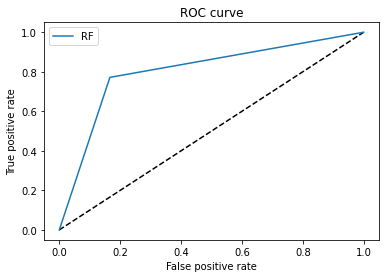

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
# y_pred_grd_rfcat = rf.predict_proba(data_test_short)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(ll_test, rf.predict(data_test_short)=="s", pos_label = "s")

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
